In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('datasets/MagicBricks.csv')

In [3]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [4]:
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,1259.000000,1259.000000,1257.000000,1226.000000,1.259000e+03,1018.000000
mean,1466.452724,2.796664,2.556086,1.935563,2.130670e+07,15690.136542
std,1568.055040,0.954425,1.042220,6.279212,2.560115e+07,21134.738568
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1259.000000
25%,800.000000,2.000000,2.000000,1.000000,5.700000e+06,6364.000000
50%,1200.000000,3.000000,2.000000,1.000000,1.420000e+07,11291.500000
75%,1700.000000,3.000000,3.000000,2.000000,2.550000e+07,18000.000000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [6]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [7]:
df.shape

(1259, 11)

In [8]:
df = df.drop(['Status', 'Locality'], axis=1)


In [9]:
cat_col=df.columns[df.dtypes=="object"]
cat_col

Index(['Furnishing', 'Transaction', 'Type'], dtype='object')

In [10]:
num_col=df.columns[df.dtypes!="object"]

In [11]:
df[num_col]

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
0,800.0,3,2.0,1.0,6500000,NaN
1,750.0,2,2.0,1.0,5000000,6667.0
2,950.0,2,2.0,1.0,15500000,6667.0
3,600.0,2,2.0,1.0,4200000,6667.0
4,650.0,2,2.0,1.0,6200000,6667.0
...,...,...,...,...,...,...
1254,4118.0,4,5.0,3.0,55000000,12916.0
1255,1050.0,3,2.0,3.0,12500000,12916.0
1256,875.0,3,3.0,3.0,17500000,12916.0
1257,990.0,2,2.0,1.0,11500000,12916.0


In [12]:
df[cat_col]

,Furnishing,Transaction,Type
0,Semi-Furnished,New_Property,Builder_Floor
1,Semi-Furnished,New_Property,Apartment
2,Furnished,Resale,Apartment
3,Semi-Furnished,Resale,Builder_Floor
4,Semi-Furnished,New_Property,Builder_Floor
...,...,...,...
1254,Unfurnished,New_Property,Builder_Floor
1255,Semi-Furnished,Resale,Builder_Floor
1256,Semi-Furnished,New_Property,Builder_Floor
1257,Unfurnished,Resale,Builder_Floor


In [13]:
df

,Area,BHK,Bathroom,Furnishing,Parking,Price,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,3.0,55000000,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,3.0,12500000,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,3.0,17500000,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,1.0,11500000,Resale,Builder_Floor,12916.0


In [14]:

num_col

Index(['Area', 'BHK', 'Bathroom', 'Parking', 'Price', 'Per_Sqft'], dtype='object')

In [15]:
df["Furnishing"].unique()


array(['Semi-Furnished', 'Furnished', 'Unfurnished', nan], dtype=object)

In [16]:
mode=df["Furnishing"].mode()[0]

In [17]:
mode

'Semi-Furnished'

In [18]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Parking         33
Price            0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [19]:
df["Bathroom"].fillna(2,inplace=True)

C:\Users\SAURABH SRIVASTAVA\AppData\Local\Temp\ipykernel_14320\2539153353.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Bathroom"].fillna(2,inplace=True)


In [20]:
df["Parking"].fillna(mode,inplace=True)

C:\Users\SAURABH SRIVASTAVA\AppData\Local\Temp\ipykernel_14320\823670237.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Parking"].fillna(mode,inplace=True)
C:\Users\SAURABH SRIVASTAVA\AppData\Local\Temp\ipykernel_14320\823670237.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Semi-Furnished' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df["Parking"].fillna(mode,inplace=True)


In [21]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       5
Parking          0
Price            0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [23]:
cat_col

Index(['Furnishing', 'Transaction', 'Type'], dtype='object')

In [24]:
df["Parking"].value_counts()

Parking
1.0               796
2.0               341
3.0                54
Semi-Furnished     33
4.0                16
5.0                 7
39.0                7
114.0               3
9.0                 1
10.0                1
Name: count, dtype: int64

In [25]:
df["Parking"].value_counts()

Parking
1.0               796
2.0               341
3.0                54
Semi-Furnished     33
4.0                16
5.0                 7
39.0                7
114.0               3
9.0                 1
10.0                1
Name: count, dtype: int64

In [26]:
df["Parking"].value_counts()


Parking
1.0               796
2.0               341
3.0                54
Semi-Furnished     33
4.0                16
5.0                 7
39.0                7
114.0               3
9.0                 1
10.0                1
Name: count, dtype: int64

In [27]:
df["Parking"]=df["Parking"].replace("Semi-Furnished",4)

C:\Users\SAURABH SRIVASTAVA\AppData\Local\Temp\ipykernel_14320\3285488752.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Parking"]=df["Parking"].replace("Semi-Furnished",4)


In [28]:
df["Furnishing"].value_counts()

Furnishing
Semi-Furnished    708
Unfurnished       363
Furnished         183
Name: count, dtype: int64

In [29]:

df['Parking'].value_counts()
values_to_drop = [9,5, 39, 114, 9, 10]

# Drop rows where column 'B' contains these values
df = df[~df['Parking'].isin(values_to_drop)]

In [31]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       5
Parking          0
Price            0
Transaction      0
Type             5
Per_Sqft       238
dtype: int64

In [32]:
mode=df["Furnishing"].mode()
df["Furnishing"].fillna(mode,inplace=True)

C:\Users\SAURABH SRIVASTAVA\AppData\Local\Temp\ipykernel_14320\1972539534.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Furnishing"].fillna(mode,inplace=True)
C:\Users\SAURABH SRIVASTAVA\AppData\Local\Temp\ipykernel_14320\1972539534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Furnishing"].fillna(mode,inplace=True)


In [33]:
df.isnull().sum()

Area             0
BHK              0
Bathroom         0
Furnishing       5
Parking          0
Price            0
Transaction      0
Type             5
Per_Sqft       238
dtype: int64

<Axes: >

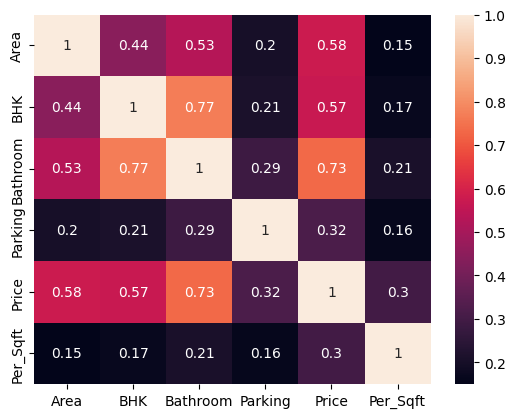

In [34]:
sns.heatmap(df[num_col].corr(),annot=True)

In [35]:
cat_col

Index(['Furnishing', 'Transaction', 'Type'], dtype='object')

In [36]:
df["Furnishing"].unique()


array(['Semi-Furnished', 'Furnished', 'Unfurnished', nan], dtype=object)

In [37]:
df["Transaction"].unique()

array(['New_Property', 'Resale'], dtype=object)

In [38]:
df


,Area,BHK,Bathroom,Furnishing,Parking,Price,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,1.0,6500000,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,1.0,5000000,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,1.0,15500000,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,1.0,4200000,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,1.0,6200000,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,3.0,55000000,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,3.0,12500000,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,3.0,17500000,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,1.0,11500000,Resale,Builder_Floor,12916.0


In [39]:
df['Furnishing'] = df['Furnishing'].replace(["NaN", "None", "nan"], pd.NA)  # Convert to proper NFurnishingN
df = df.dropna(subset=['Furnishing'])

C:\Users\SAURABH SRIVASTAVA\AppData\Local\Temp\ipykernel_14320\593053035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Furnishing'] = df['Furnishing'].replace(["NaN", "None", "nan"], pd.NA)  # Convert to proper NFurnishingN


In [40]:
df["Type"].unique()

array(['Builder_Floor', 'Apartment'], dtype=object)

In [41]:
furn_map={'Unfurnished':1,'Semi-Furnished':2,'Furnished':3}
df["Furnishing"]=df["Furnishing"].map(furn_map)
type_map={'Builder_Floor':2,'Apartment':1}
df['Type']=df["Type"].map(type_map)
trans_map={'New_Property':2,'Resale':1}
df["Transaction"]=df["Transaction"].map(trans_map)


C:\Users\SAURABH SRIVASTAVA\AppData\Local\Temp\ipykernel_14320\2486753194.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Furnishing"]=df["Furnishing"].map(furn_map)
C:\Users\SAURABH SRIVASTAVA\AppData\Local\Temp\ipykernel_14320\2486753194.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type']=df["Type"].map(type_map)
C:\Users\SAURABH SRIVASTAVA\AppData\Local\Temp\ipykernel_14320\2486753194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [42]:
df

,Area,BHK,Bathroom,Furnishing,Parking,Price,Transaction,Type,Per_Sqft
0,800.0,3,2.0,2,1.0,6500000,2,2,NaN
1,750.0,2,2.0,2,1.0,5000000,2,1,6667.0
2,950.0,2,2.0,3,1.0,15500000,1,1,6667.0
3,600.0,2,2.0,2,1.0,4200000,1,2,6667.0
4,650.0,2,2.0,2,1.0,6200000,2,2,6667.0
...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,1,3.0,55000000,2,2,12916.0
1255,1050.0,3,2.0,2,3.0,12500000,1,2,12916.0
1256,875.0,3,3.0,2,3.0,17500000,2,2,12916.0
1257,990.0,2,2.0,1,1.0,11500000,1,2,12916.0


In [43]:
mean=df["Per_Sqft"].mean()
df["Per_Sqft"].fillna(mean,inplace=True
                      )

C:\Users\SAURABH SRIVASTAVA\AppData\Local\Temp\ipykernel_14320\2067973700.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Per_Sqft"].fillna(mean,inplace=True
C:\Users\SAURABH SRIVASTAVA\AppData\Local\Temp\ipykernel_14320\2067973700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Per_Sqft"].fillna(mean,inplace=True


In [44]:
df


,Area,BHK,Bathroom,Furnishing,Parking,Price,Transaction,Type,Per_Sqft
0,800.0,3,2.0,2,1.0,6500000,2,2,15631.672345
1,750.0,2,2.0,2,1.0,5000000,2,1,6667.000000
2,950.0,2,2.0,3,1.0,15500000,1,1,6667.000000
3,600.0,2,2.0,2,1.0,4200000,1,2,6667.000000
4,650.0,2,2.0,2,1.0,6200000,2,2,6667.000000
...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,1,3.0,55000000,2,2,12916.000000
1255,1050.0,3,2.0,2,3.0,12500000,1,2,12916.000000
1256,875.0,3,3.0,2,3.0,17500000,2,2,12916.000000
1257,990.0,2,2.0,1,1.0,11500000,1,2,12916.000000


In [45]:
y=df["Price"]

In [46]:
X=df.drop(labels=["Price"],axis=1)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler();
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [53]:
X_train_scaled

array([[-0.13550815,  0.17023735,  0.36227563, ..., -0.81335015,
         0.93933644, -0.48096946],
       [-0.65152582, -0.87291916, -0.58336226, ..., -0.81335015,
        -1.06458129, -0.68599676],
       [ 0.44501172,  1.21339385,  1.30791351, ...,  1.22948278,
         0.93933644,  0.47096713],
       ...,
       [-0.26451257, -0.87291916, -0.58336226, ..., -0.81335015,
        -1.06458129,  0.84754445],
       [-0.39351698, -0.87291916, -0.58336226, ..., -0.81335015,
        -1.06458129,  0.00783681],
       [-0.39351698,  0.17023735, -0.58336226, ..., -0.81335015,
         0.93933644,  0.46967305]], shape=(864, 8))

In [54]:
X_test_scaled

array([[-0.32901478,  0.17023735,  0.36227563, ..., -0.81335015,
        -1.06458129,  0.00783681],
       [-0.03552973, -0.87291916, -0.58336226, ..., -0.81335015,
        -1.06458129,  0.19172715],
       [-0.39351698, -0.87291916, -1.52900015, ...,  1.22948278,
         0.93933644, -0.49655468],
       ...,
       [-0.13550815,  0.17023735,  0.36227563, ..., -0.81335015,
         0.93933644, -0.46656578],
       [-0.03875484,  0.17023735,  0.36227563, ...,  1.22948278,
         0.93933644,  0.00783681],
       [-0.10325705,  0.17023735,  0.36227563, ..., -0.81335015,
         0.93933644,  0.00783681]], shape=(371, 8))

In [55]:
"""linear regression
ridge regression
lasso regression
elastic net"""

## Model Training

from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [56]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [57]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}

In [58]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [59]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet']

In [60]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()


In [61]:
models.items()

dict_items([('LinearRegression', LinearRegression()), ('Lasso', Lasso()), ('Ridge', Ridge()), ('Elasticnet', ElasticNet())])

In [63]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train_scaled,y_train)
    #Make Predictions
    y_pred=model.predict(X_test_scaled)

    #this is a validation(test) score
    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 15004570.82950197
MAE: 8632092.748417497
R2 score 54.28997044118052


Lasso
Model Training Performance
RMSE: 15004570.569781784
MAE: 8632092.540976102
R2 score 54.28997202360728


Ridge
Model Training Performance
RMSE: 15002125.725044034
MAE: 8627133.24488113
R2 score 54.304866794003914


Elasticnet
Model Training Performance
RMSE: 14976587.183519598
MAE: 8354106.169618948
R2 score 54.4603105998664


